In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def mape_zeroless(act, pred):
    
    mape = pd.DataFrame({'act':act.reshape(-1,).round(2), 'pred':pred.reshape(-1,).round(2)})
    mape['error'] = np.abs((mape.act-mape.pred) /mape.act)
    
    zero_idx = mape[mape.act == 0].index
    mape.drop(zero_idx, axis=0, inplace=True)

    return np.mean(mape.error) * 100

In [7]:
def model_rf(X, y, site):
    
    sc = MinMaxScaler()
    X_sc = sc.fit_transform(X)
    y_sc = sc.fit_transform(y)
#     y_sc = y
    
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.3, random_state=42) #shuffle=False
    
    rfModel = RandomForestRegressor(n_estimators=25, max_features=11, max_depth=25, min_samples_split=3,
                                    min_samples_leaf=2, verbose=1, random_state=0)
    rfModel.fit(X_train, y_train)

    y_pred = rfModel.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(site,'\n')
    print("rmse : %.4f | r2 : %.4f \n" % (error, r2))
    print("MAPE : %.4f \n" % (100 - mape_zeroless(y_test, y_pred)))
    
    y_test_hat=pd.DataFrame(y_test.copy())
    y_test_hat['pred'] = pd.DataFrame(y_pred)

    fig, loss_ax = plt.subplots(figsize = (30,8))

    # plt.figure(figsize = (30,12))

    acc_ax=loss_ax.twinx()

    loss_ax.plot(y_test_hat.iloc[:,0][:100], 'b', label='act')
    loss_ax.plot(y_test_hat['pred'][:100], 'r', label='pred')

    loss_ax.legend(loc='upper right')

    plt.show()

In [16]:
def model_rf_2(X, y, site):
    
    sc = MinMaxScaler()
    X_sc = sc.fit_transform(X)
    y_sc = sc.fit_transform(y)
#     y_sc = y
    
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.3, random_state=42) #shuffle=False
    
    rfModel = RandomForestRegressor(n_estimators=25, max_features=11, max_depth=25, min_samples_split=3,
                                    min_samples_leaf=2, verbose=1, random_state=0)
    rfModel.fit(X_train, y_train)

    y_pred = rfModel.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(site,'\n')
    print("rmse : %.4f | r2 : %.4f \n" % (error, r2))
    print("MAPE : %.4f \n" % (100 - mape_zeroless(y_test, y_pred)))
    
    y_test_hat=pd.DataFrame(y_test.copy())
    y_test_hat['pred'] = pd.DataFrame(y_pred)

    fig, loss_ax = plt.subplots(figsize = (10,8))

    # plt.figure(figsize = (30,12))

    acc_ax=loss_ax.twinx()

    loss_ax.plot(y_test_hat.iloc[:,0][:30], 'b', label='act')
    loss_ax.plot(y_test_hat['pred'][:30], 'r', label='pred')

    loss_ax.legend(loc='upper right')

    plt.show()

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


A_site 

rmse : 0.0623 | r2 : 0.9453 

MAPE : 59.4675 



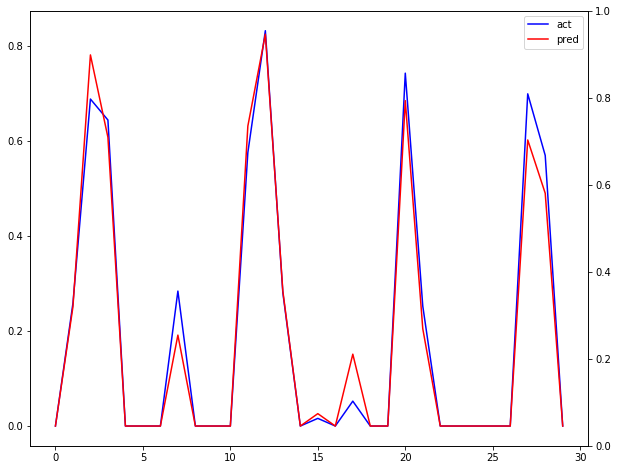

In [19]:
model_rf_2(aaa[aaa.columns[5:]], aaa[[aaa.columns[3]]], 'A_site')

In [17]:
aaa = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/aaa.pkl')
bbb = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/bbb.pkl')
ccc = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/ccc.pkl')
aaa_r = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/aaa_r.pkl')
bbb_r = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/bbb_r.pkl')
ccc_r = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/ccc_r.pkl')

### X:예보기상, Y:실시간 발전량

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


A_site 

rmse : 0.0667 | r2 : 0.9278 

MAPE : 50.6098 



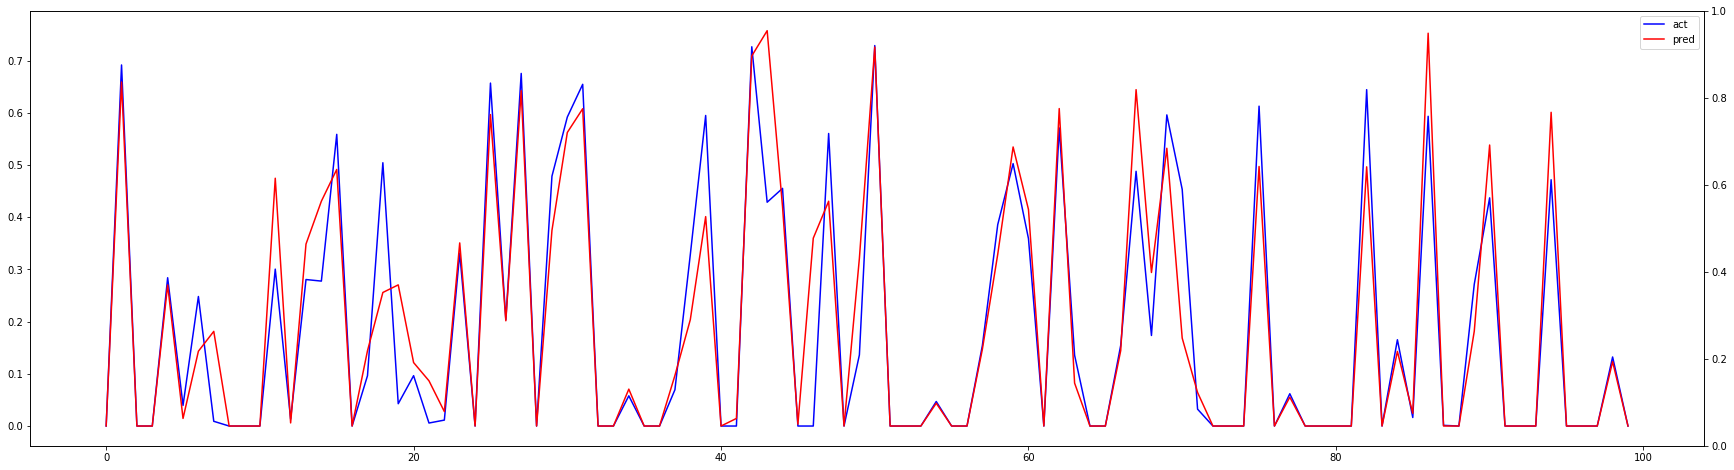

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


B_site 

rmse : 0.0664 | r2 : 0.9237 

MAPE : 48.1482 



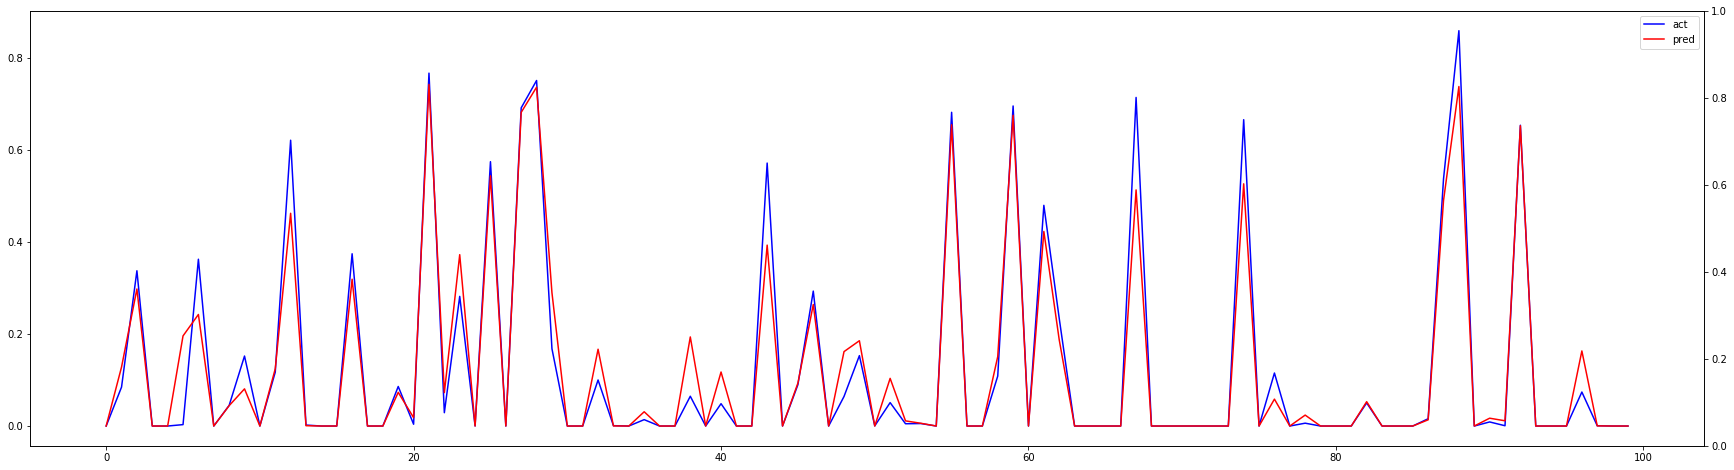

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


C_site 

rmse : 0.0607 | r2 : 0.9128 

MAPE : 31.0277 



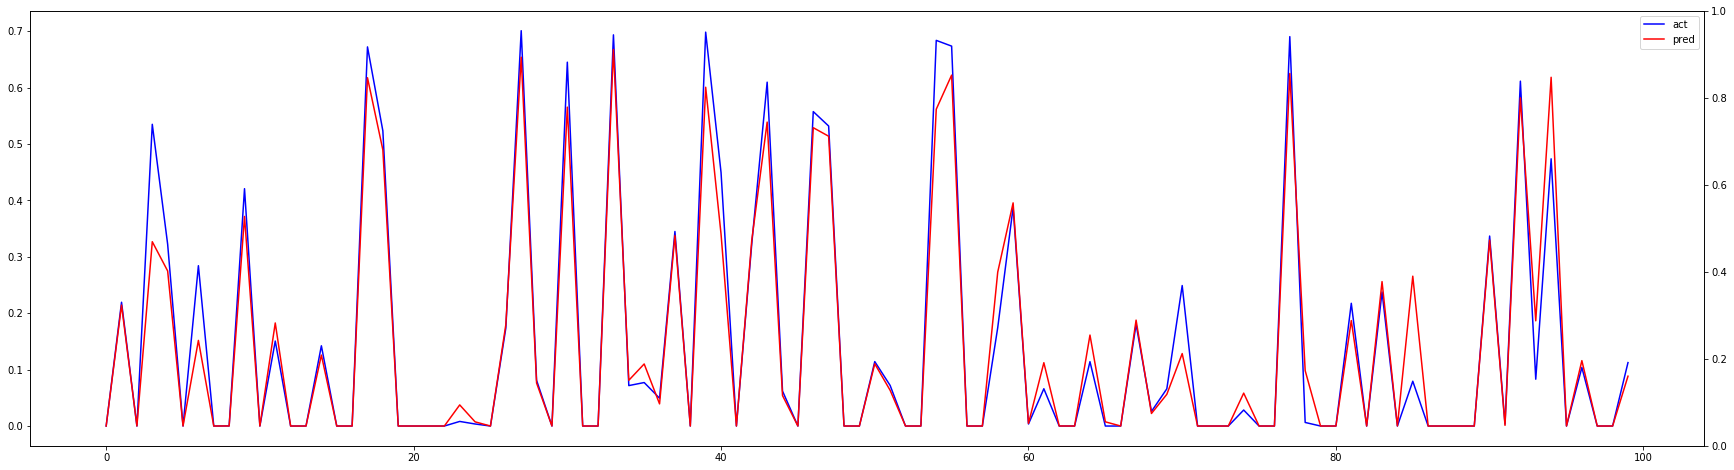

In [58]:
model_rf(aaa[aaa.columns[5:]], aaa[[aaa.columns[3]]], 'A_site')
model_rf(bbb[bbb.columns[5:]], bbb[[bbb.columns[3]]], 'B_site')
model_rf(ccc[ccc.columns[5:]], ccc[[ccc.columns[3]]], 'C_site')

In [7]:
# model_rf(aaa_r[aaa_r.columns[5:]], aaa_r[[aaa_r.columns[3]]], 'A_site')
# model_rf(bbb_r[bbb_r.columns[5:]], bbb_r[[bbb_r.columns[3]]], 'B_site')
# model_rf(ccc_r[ccc_r.columns[5:]], ccc_r[[ccc_r.columns[3]]], 'C_site')

### X:예보기상, Y:누적 발전량

In [8]:
model_rf(aaa[aaa.columns[5:]], aaa[[aaa.columns[4]]], 'A_site')
model_rf(bbb[bbb.columns[5:]], bbb[[bbb.columns[4]]], 'B_site')
model_rf(ccc[ccc.columns[5:]], ccc[[ccc.columns[4]]], 'C_site')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


A_site 

rmse : 0.0417 | r2 : 0.9805 

MAPE : 77.2615 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


B_site 

rmse : 0.0674 | r2 : 0.9203 

MAPE : 50.7030 

C_site 

rmse : 0.0437 | r2 : 0.9777 

MAPE : 65.5126 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [9]:
# model_rf(aaa_r[aaa_r.columns[5:]], aaa_r[[aaa_r.columns[4]]], 'A_site')
# model_rf(bbb_r[bbb_r.columns[5:]], bbb_r[[bbb_r.columns[4]]], 'B_site')
# model_rf(ccc_r[ccc_r.columns[5:]], ccc_r[[ccc_r.columns[4]]], 'C_site')

### dust 1개 사용시
### X:예보기상, Y:실시간 발전량

In [10]:
aaa.columns[5:18]

Index(['month', 'day', 'hour', 'minute', 'temperature_3H', 'sky',
       'rainfall_probability', 'rainfall', 'snow', 'humidity', 'wind_speed',
       'wind_direction', 'Elevation_angle'],
      dtype='object')

In [11]:
model_rf(aaa[aaa.columns[5:18]], aaa[[aaa.columns[3]]], 'A_site')
model_rf(bbb[bbb.columns[5:18]], bbb[[bbb.columns[3]]], 'B_site')
model_rf(ccc[ccc.columns[5:18]], ccc[[ccc.columns[3]]], 'C_site')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


A_site 

rmse : 0.0666 | r2 : 0.9281 

MAPE : 51.0436 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


B_site 

rmse : 0.0705 | r2 : 0.9142 

MAPE : 46.7332 

C_site 

rmse : 0.0599 | r2 : 0.9150 

MAPE : 37.1677 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [12]:
# model_rf(aaa_r[aaa_r.columns[5:18]], aaa_r[[aaa_r.columns[3]]], 'A_site')
# model_rf(bbb_r[bbb_r.columns[5:18]], bbb_r[[bbb_r.columns[3]]], 'B_site')
# model_rf(ccc_r[ccc_r.columns[5:18]], ccc_r[[ccc_r.columns[3]]], 'C_site')

### dust 1개 사용시
### X:예보기상, Y:누적 발전량

In [13]:
model_rf(aaa[aaa.columns[5:18]], aaa[[aaa.columns[4]]], 'A_site')
model_rf(bbb[bbb.columns[5:18]], bbb[[bbb.columns[4]]], 'B_site')
model_rf(ccc[ccc.columns[5:18]], ccc[[ccc.columns[4]]], 'C_site')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


A_site 

rmse : 0.0392 | r2 : 0.9827 

MAPE : 78.3187 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


B_site 

rmse : 0.0695 | r2 : 0.9154 

MAPE : 50.1622 

C_site 

rmse : 0.0322 | r2 : 0.9879 

MAPE : 74.5714 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [14]:
# model_rf(aaa_r[aaa_r.columns[5:18]], aaa_r[[aaa_r.columns[4]]], 'A_site')
# model_rf(bbb_r[bbb_r.columns[5:18]], bbb_r[[bbb_r.columns[4]]], 'B_site')
# model_rf(ccc_r[ccc_r.columns[5:18]], ccc_r[[ccc_r.columns[4]]], 'C_site')

### dust 1개 사용 & month, day 제외
### X:예보기상, Y:실시간 발전량

In [59]:
aaa.columns[7:18]

Index(['hour', 'minute', 'temperature_3H', 'sky', 'rainfall_probability',
       'rainfall', 'snow', 'humidity', 'wind_speed', 'wind_direction',
       'Elevation_angle'],
      dtype='object')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


A_site 

rmse : 0.0749 | r2 : 0.9091 

MAPE : 44.2308 



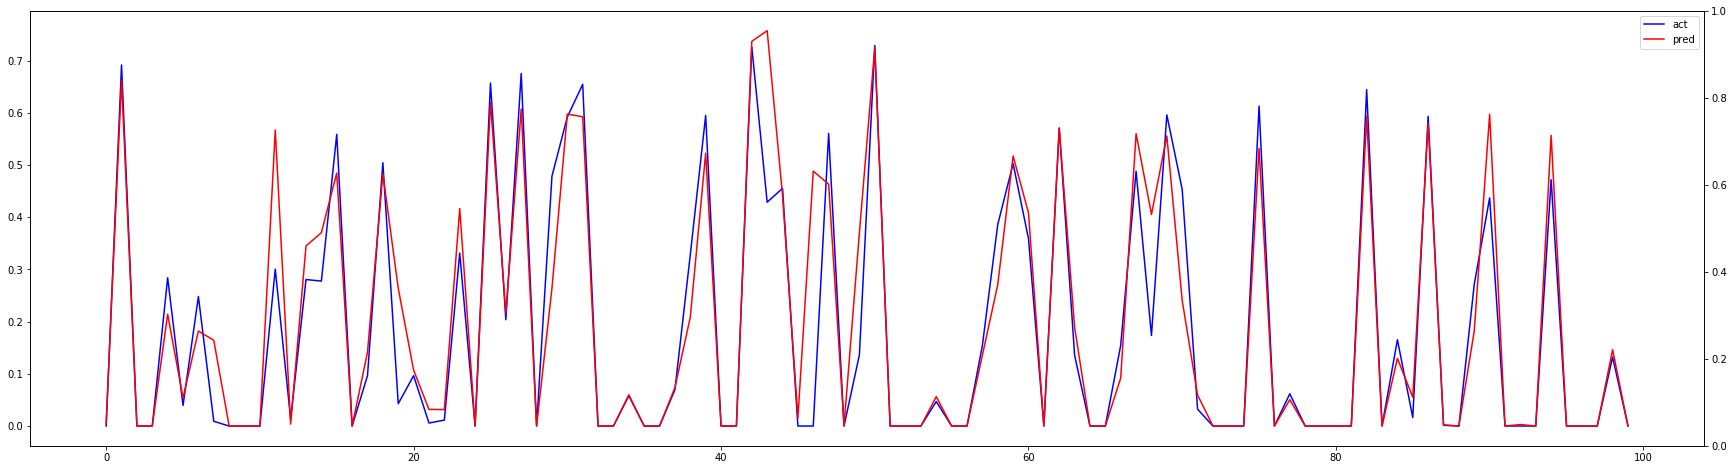

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


B_site 

rmse : 0.0753 | r2 : 0.9020 

MAPE : 42.1535 



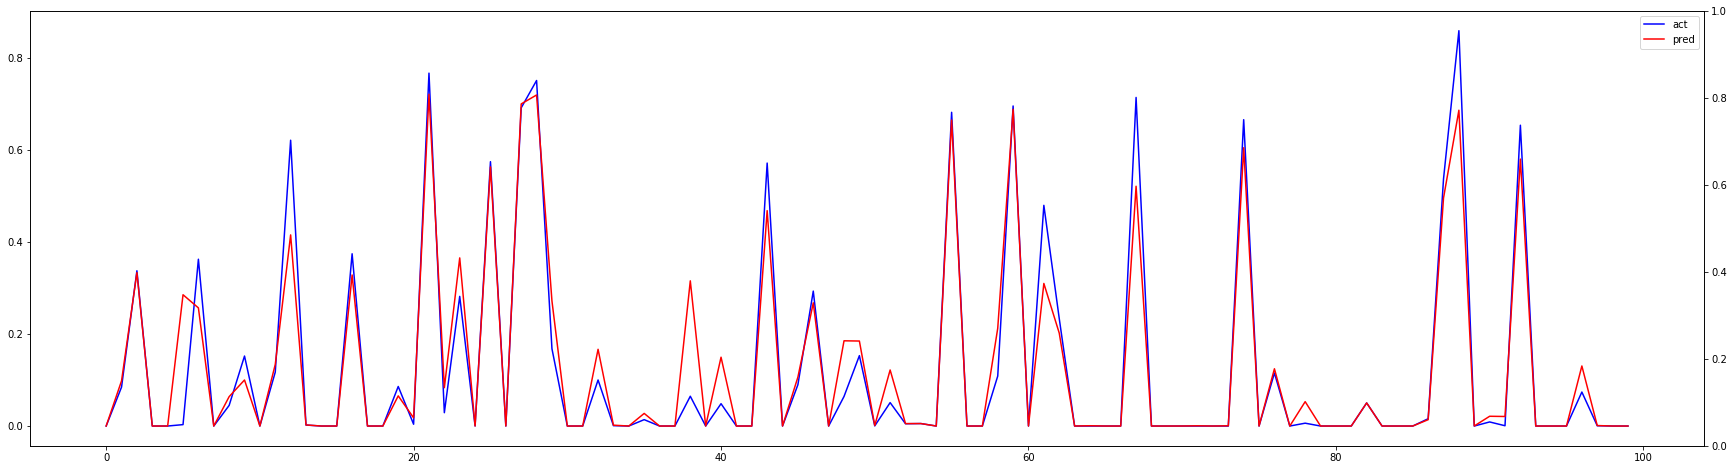

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


C_site 

rmse : 0.0628 | r2 : 0.9065 

MAPE : 35.1564 



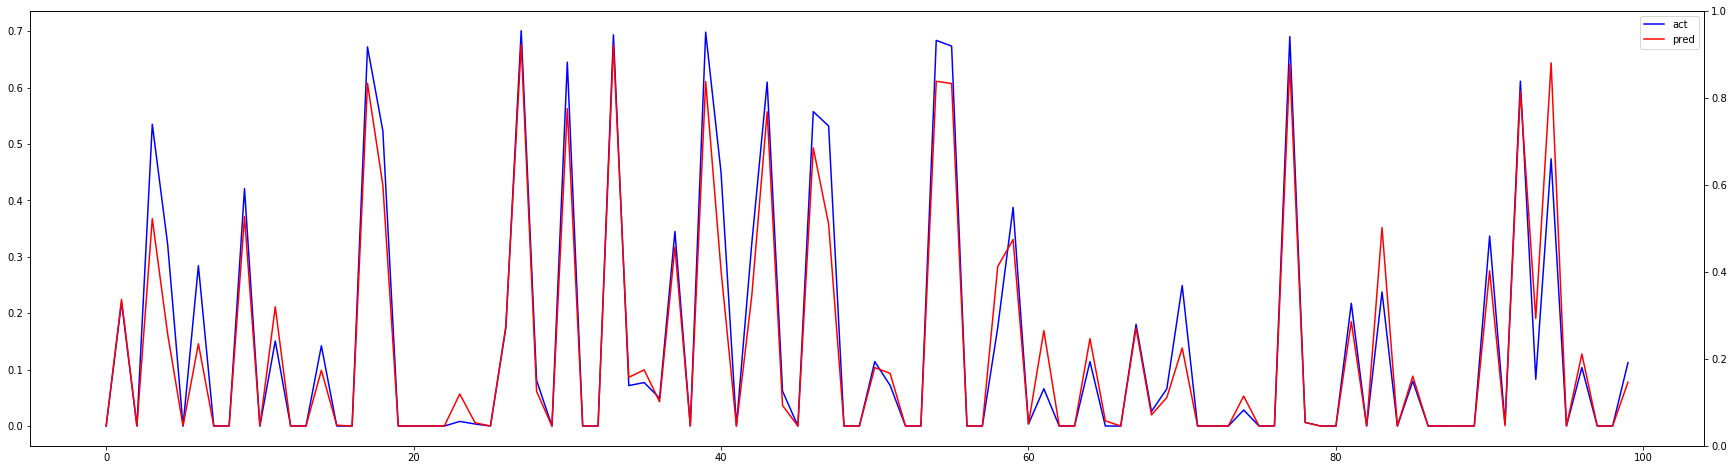

In [60]:
model_rf(aaa[aaa.columns[7:18]], aaa[[aaa.columns[3]]], 'A_site')
model_rf(bbb[bbb.columns[7:18]], bbb[[bbb.columns[3]]], 'B_site')
model_rf(ccc[ccc.columns[7:18]], ccc[[ccc.columns[3]]], 'C_site')

In [17]:
# model_rf(aaa_r[aaa_r.columns[7:18]], aaa_r[[aaa_r.columns[4]]], 'A_site')
# model_rf(bbb_r[bbb_r.columns[7:18]], bbb_r[[bbb_r.columns[4]]], 'B_site')
# model_rf(ccc_r[ccc_r.columns[7:18]], ccc_r[[ccc_r.columns[4]]], 'C_site')

### dust 1개 사용 & month, day 제외
### X:예보기상, Y:누적 발전량

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


A_site 

rmse : 0.0524 | r2 : 0.9692 

MAPE : 73.9350 



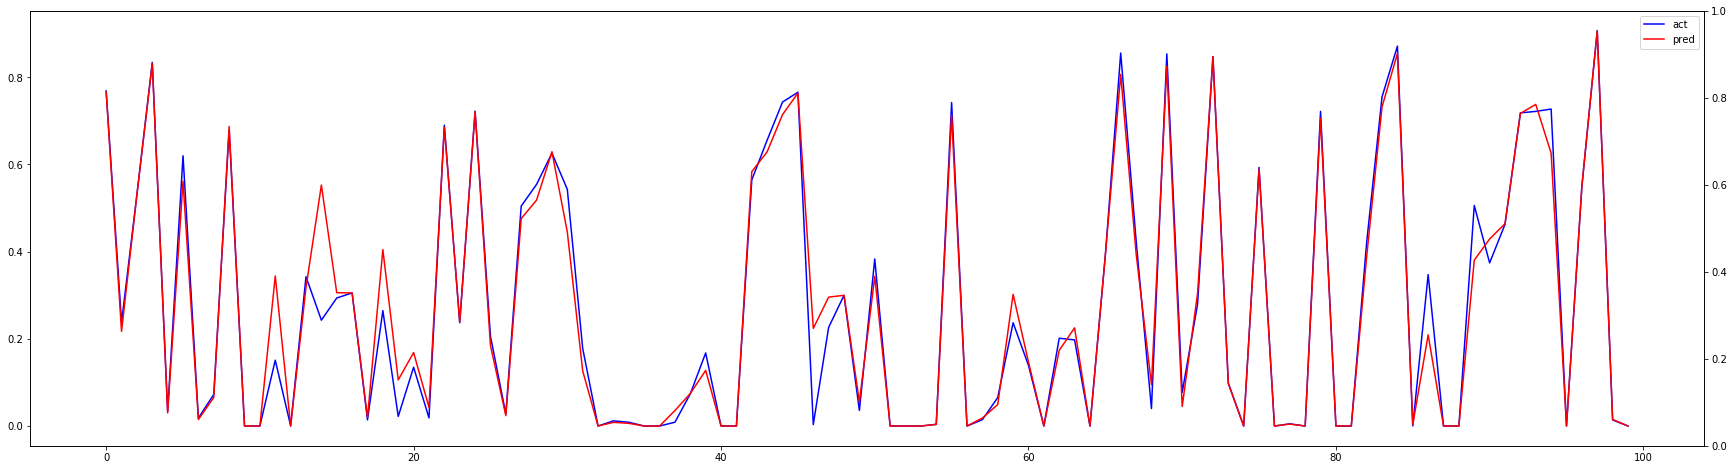

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


B_site 

rmse : 0.0748 | r2 : 0.9018 

MAPE : 44.4606 



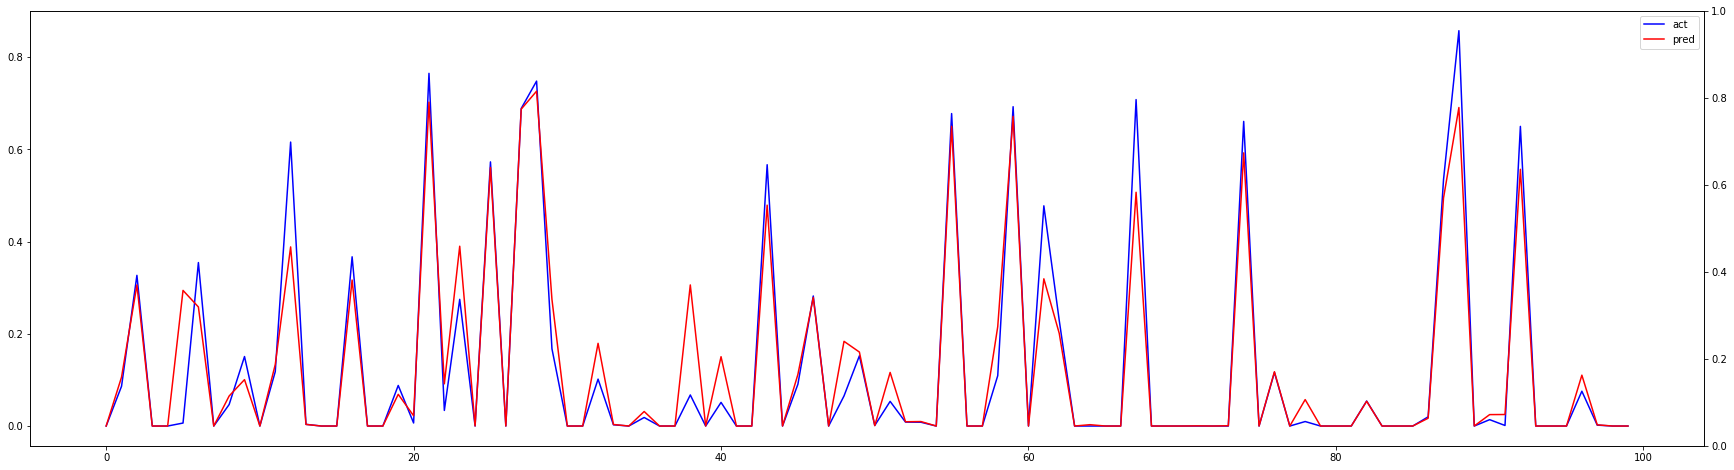

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


C_site 

rmse : 0.0412 | r2 : 0.9802 

MAPE : 69.6215 



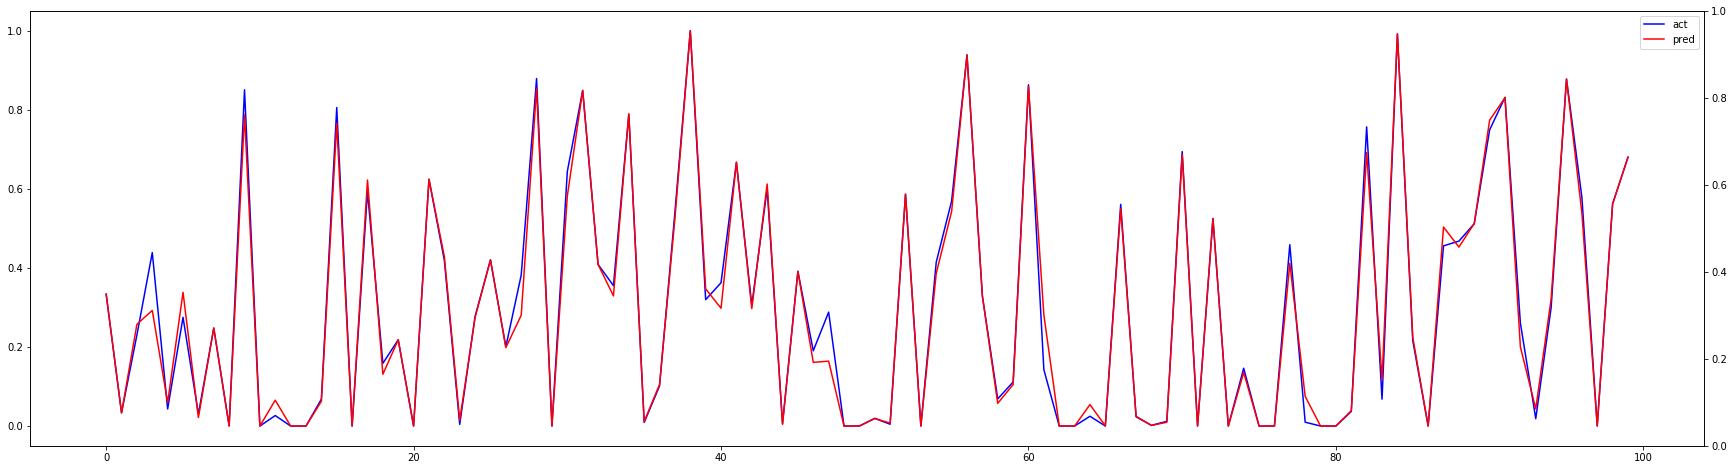

In [61]:
model_rf(aaa[aaa.columns[7:18]], aaa[[aaa.columns[4]]], 'A_site')
model_rf(bbb[bbb.columns[7:18]], bbb[[bbb.columns[4]]], 'B_site')
model_rf(ccc[ccc.columns[7:18]], ccc[[ccc.columns[4]]], 'C_site')

In [62]:
# model_rf(aaa_r[aaa_r.columns[7:18]], aaa_r[[aaa_r.columns[4]]], 'A_site')
# model_rf(bbb_r[bbb_r.columns[7:18]], bbb_r[[bbb_r.columns[4]]], 'B_site')
# model_rf(ccc_r[ccc_r.columns[7:18]], ccc_r[[ccc_r.columns[4]]], 'C_site')

### LightGBM

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

import lightgbm as lgb

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# preprocessing II : make X, y // train, text // scaling
def preprocessing(data_raw, target='real_time_power', split_line=0.3, shuffle=True, df=False):
    
    # make X, y
    if target == 'real_time_power':
        y = data_raw[['real_time_power']]
        X = data_raw.drop(['time', 'solar1', 'solar2', 'real_time_power', 'day_power'], axis=1)
    elif target == 'day_power':
        y = data_raw[['day_power']]
        X = data_raw.drop(['time', 'solar1', 'solar2', 'real_time_power', 'day_power'], axis=1)        
    elif target == 'solar1':
        y = data_raw[['solar1']]
        X = data_raw.drop(['time', 'solar1', 'solar2', 'real_time_power', 'day_power'], axis=1)
    elif target == 'solar2':
        y = data_raw[['solar2']]
        X = data_raw.drop(['time', 'solar1', 'solar2', 'real_time_power', 'day_power'], axis=1)
    else:
        print("No target.")

    # scaling
    mms = MinMaxScaler()
    y_sc = mms.fit_transform(y)
    X_sc = mms.fit_transform(X)

    # train, test split
    if split_line <= 1:
        X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=split_line, 
                                                            random_state=42, shuffle=shuffle)
    elif split_line > 1:        
        X_train = X_sc[:split_line, :]
        X_test = X_sc[split_line:, :]
        y_train = y_sc[:split_line, :]
        y_test = y_sc[split_line:, :]
    else:
        print('No split_line')
    
    # make df
    X_df = pd.DataFrame(data=X_sc, columns=X.columns)
    y_df = pd.DataFrame(data=y_sc, columns=y.columns)
        
    # reshape y_train, y_test
    if split_line <= 1:
        n = y_train.shape[0]
        y_train = y_train.reshape(n,)
        n = y_test.shape[0]
        y_test = y_test.reshape(n,)
    
    if df == False:
        return X_train, X_test, y_train, y_test, X_sc, y_sc
    else:
        return X_df, y_df

In [13]:
def model_v1(data_raw, model='rf', target='real_time_power', split_line=0.3, shuffle=True):
    """
    prototype model. Using forecast data.
    """
    
    # make dataset
    data_power = data_raw.copy()

    # preprocessing
    X_train_sc, X_test_sc , y_train_sc, y_test_sc, X_sc, y_sc = preprocessing(data_power, target=target,
                                                                              split_line=split_line, shuffle=shuffle)

    print("Predicting '%s' with '%s' algorithm ..." % (target, model))
    # modeling
    if model == 'linear_sm':
        model_sm = sm.OLS(y_train_sc, X_train_sc)
        result = model_sm.fit()
        y_pred = result.predict(X_test_sc)

        rmse = np.sqrt(mean_squared_error(y_test_sc, y_pred))
        r2 = r2_score(y_test_sc, y_pred)
        mape = mape_zeroless(y_test_sc, y_pred)
        print("rmse : %.4f | r2 : %.4f | mape : %.4f" % (rmse, r2, mape))
        print("-" * 50)
        print(result.summary())
        return rmse, r2, mape
    
        fig, loss_ax = plt.subplots(figsize = (30,8))

        # plt.figure(figsize = (30,12))

        acc_ax=loss_ax.twinx()

        loss_ax.plot(y_test_sc[:100], 'b', label='act')
        loss_ax.plot(y_pred[:100], 'r', label='pred')

        loss_ax.legend(loc='upper right')

        plt.show()
    else:
        if model == 'rf':
            model_load = RandomForestRegressor(n_estimators=25, max_features=11, max_depth=25, min_samples_split=3,
                                    min_samples_leaf=2, verbose=1, random_state=0)
        elif model == 'lgb':
            model_load = lgb.LGBMRegressor(silent=False, n_jobs=4)
        elif model == 'linear':
            model_load = LinearRegression()
        elif model == 'svm':
            model_load = SVR(C=20)
        else:
            print("No model.")

        model_last = model_load.fit(X_train_sc, y_train_sc)
        y_pred = model_last.predict(X_test_sc)
        rmse = np.sqrt(np.mean(np.power(y_pred - y_test_sc, 2)))
        r2 = r2_score(y_test_sc, y_pred)
        mape = mape_zeroless(y_test_sc, y_pred)
        
        cv = ShuffleSplit(n_splits=10, test_size=split_line)
        cv_score = cross_val_score(model_load, X_sc, y_sc, scoring='r2', cv=cv, n_jobs=4, verbose=2)
        
        print("rmse : %.4f | r2 : %.4f | mape : %.4f | cv : %.4f" % (rmse, r2, mape, np.mean(cv_score)))
        print("-" * 50)
        
        fig, loss_ax = plt.subplots(figsize = (30,8))

        # plt.figure(figsize = (30,12))

        acc_ax=loss_ax.twinx()

        loss_ax.plot(y_test_sc[:100], 'b', label='act')
        loss_ax.plot(y_pred[:100], 'r', label='pred')

        loss_ax.legend(loc='upper right')

        plt.show()
        
        return rmse, r2, mape, np.mean(cv_score)

Predicting 'real_time_power' with 'lgb' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    8.4s finished


rmse : 0.0663 | r2 : 0.9380 | mape : 43.9930 | cv : 0.9367
--------------------------------------------------


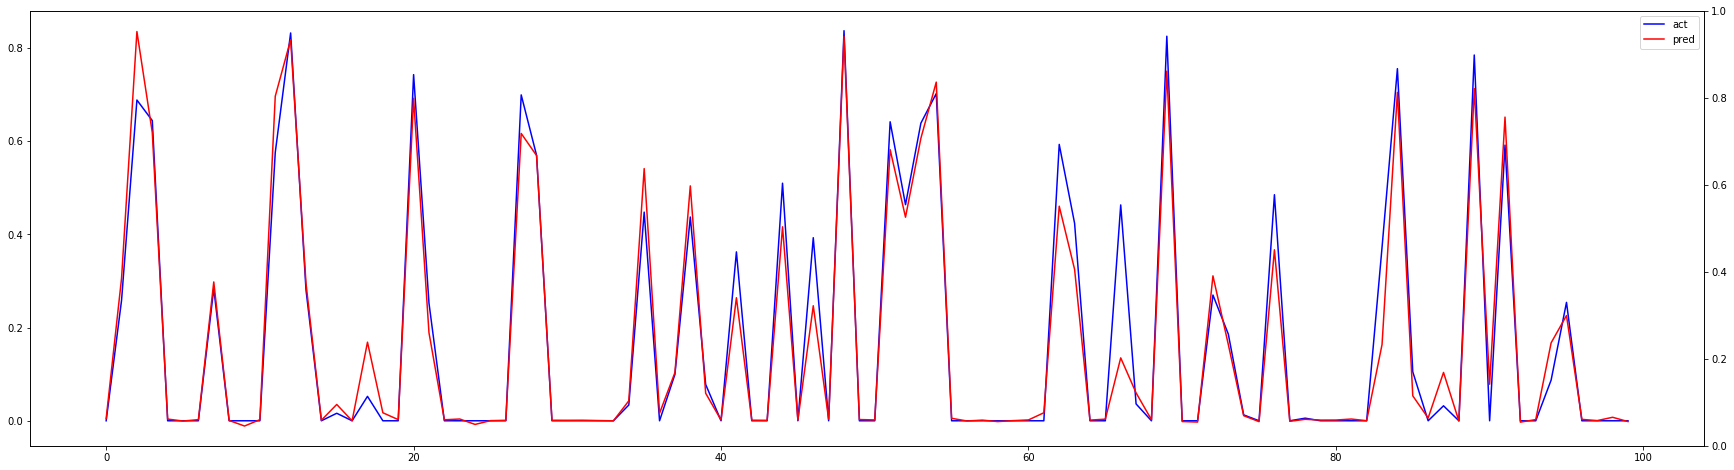

(0.06629036257211407,
 0.9380325839892217,
 43.99304600237068,
 0.9367115642572458)

In [14]:
model_v1(aaa, model='lgb', target='real_time_power', split_line=0.3, shuffle=True)

In [23]:
%%time
model_v1(aaa, model='lgb', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa, model='lgb', target='day_power', split_line=0.3, shuffle=True)
model_v1(aaa, model='rf', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa, model='rf', target='day_power', split_line=0.3, shuffle=True)
model_v1(aaa, model='linear', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa, model='linear', target='day_power', split_line=0.3, shuffle=True)
model_v1(aaa, model='svm', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa, model='svm', target='day_power', split_line=0.3, shuffle=True)

Predicting 'real_time_power' with 'lgb' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    8.6s finished


rmse : 0.0778 | r2 : 0.9020 | mape : 58.0705 | cv : 0.9032
--------------------------------------------------
Predicting 'day_power' with 'lgb' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    9.1s finished


rmse : 0.0614 | r2 : 0.9578 | mape : 32.9467 | cv : 0.9553
--------------------------------------------------
Predicting 'real_time_power' with 'rf' algorithm ...


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   15.8s finished


rmse : 0.0667 | r2 : 0.9278 | mape : 49.3902 | cv : 0.9282
--------------------------------------------------
Predicting 'day_power' with 'rf' algorithm ...


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   18.4s finished


rmse : 0.0417 | r2 : 0.9805 | mape : 22.7385 | cv : 0.9803
--------------------------------------------------
Predicting 'real_time_power' with 'linear' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.0s finished


rmse : 0.1591 | r2 : 0.5895 | mape : 151.8580 | cv : 0.5929
--------------------------------------------------
Predicting 'day_power' with 'linear' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.2s finished


rmse : 0.1616 | r2 : 0.7070 | mape : 141.6513 | cv : 0.6976
--------------------------------------------------
Predicting 'real_time_power' with 'svm' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.7min finished


rmse : 0.1259 | r2 : 0.7430 | mape : 119.6452 | cv : 0.7488
--------------------------------------------------
Predicting 'day_power' with 'svm' algorithm ...
rmse : 0.1345 | r2 : 0.7970 | mape : 88.0401 | cv : 0.7896
--------------------------------------------------
Wall time: 5min 16s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.5min finished


In [24]:
%%time
model_v1(aaa_r, model='lgb', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa_r, model='lgb', target='day_power', split_line=0.3, shuffle=True)
model_v1(aaa_r, model='rf', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa_r, model='rf', target='day_power', split_line=0.3, shuffle=True)
model_v1(aaa_r, model='linear', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa_r, model='linear', target='day_power', split_line=0.3, shuffle=True)
model_v1(aaa_r, model='svm', target='real_time_power', split_line=0.3, shuffle=True)
model_v1(aaa_r, model='svm', target='day_power', split_line=0.3, shuffle=True)

Predicting 'real_time_power' with 'lgb' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    8.1s finished


rmse : 0.0664 | r2 : 0.9378 | mape : 45.2513 | cv : 0.9364
--------------------------------------------------
Predicting 'day_power' with 'lgb' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.9s finished


rmse : 0.0478 | r2 : 0.9752 | mape : 26.8740 | cv : 0.9732
--------------------------------------------------
Predicting 'real_time_power' with 'rf' algorithm ...


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    9.9s finished


rmse : 0.0624 | r2 : 0.9451 | mape : 41.6606 | cv : 0.9416
--------------------------------------------------
Predicting 'day_power' with 'rf' algorithm ...


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   11.0s finished


rmse : 0.0358 | r2 : 0.9861 | mape : 18.3401 | cv : 0.9844
--------------------------------------------------
Predicting 'real_time_power' with 'linear' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.9s finished


rmse : 0.1658 | r2 : 0.6124 | mape : 169.6996 | cv : 0.6182
--------------------------------------------------
Predicting 'day_power' with 'linear' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.1s finished


rmse : 0.1585 | r2 : 0.7280 | mape : 145.9435 | cv : 0.7217
--------------------------------------------------
Predicting 'real_time_power' with 'svm' algorithm ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   52.3s finished


rmse : 0.1186 | r2 : 0.8017 | mape : 115.1968 | cv : 0.8016
--------------------------------------------------
Predicting 'day_power' with 'svm' algorithm ...
rmse : 0.1184 | r2 : 0.8482 | mape : 83.7857 | cv : 0.8445
--------------------------------------------------
Wall time: 3min 21s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.2min finished


### 0값 삭제

In [25]:
aaa = aaa[aaa.real_time_power != 0].copy()
aaa.reset_index(inplace=True)
bbb =bbb[bbb.real_time_power != 0].copy()
bbb.reset_index(inplace=True)
ccc = ccc[ccc.real_time_power != 0].copy()
ccc.reset_index(inplace=True)

In [26]:
model_rf(aaa[aaa.columns[5:18]], aaa[[aaa.columns[3]]], 'A_site')
model_rf(bbb[bbb.columns[5:18]], bbb[[bbb.columns[3]]], 'B_site')
model_rf(ccc[ccc.columns[5:18]], ccc[[ccc.columns[3]]], 'C_site')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


A_site 

rmse : 0.0784 | r2 : 0.9256 

MAPE : 73.8795 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


B_site 

rmse : 0.1328 | r2 : 0.5323 

MAPE : 33.0277 

C_site 

rmse : 0.0773 | r2 : 0.9181 

MAPE : 68.9894 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [27]:
model_rf(aaa[aaa.columns[5:18]], aaa[[aaa.columns[4]]], 'A_site')
model_rf(bbb[bbb.columns[5:18]], bbb[[bbb.columns[4]]], 'B_site')
model_rf(ccc[ccc.columns[5:18]], ccc[[ccc.columns[4]]], 'C_site')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


A_site 

rmse : 0.0850 | r2 : 0.8991 

MAPE : 69.1860 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


B_site 

rmse : 0.0030 | r2 : 0.9999 

MAPE : 99.2590 

C_site 

rmse : 0.0725 | r2 : 0.8965 

MAPE : 68.3327 



[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
